In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Consider the combustion equation for fuel CxHy
# CxHy + b(O2+3.76N2)----> xCO2 + (0.5y)H2O + ((2a-2x-0.5y)/2)O2 + (3.76b)N2
# CxHy + a(O2+3.76N2)----> b(4x/4x+y)CO2 + (2by/4x+y)H2O + (3.76b)N2 + (4x+y-4b/4x+y)CxHy
 
x = 1
y = 4   #For CH4
Ti = [298,500,700]
Tadmax = []

#Standard Enthalpy of Formation
hf_fuel = -74831  #For CH4
hf_O2  = 0
hf_N2 = 0
hf_CO2 = -393546
hf_H2O = -241845

In [5]:
def part1(Ti):
  #Averaged cp @ 1200K 
  cp_fuel = 78.84  #For CH4
  cp_O2 = 35.59
  cp_N2 = 33.71
  cp_CO2 = 56.21
  cp_H2O = 43.87

  phi=[]
  Tad=[]
  for i in np.arange(0.5,1.6,0.1):
    r0 = ((x+0.25*y)*137.28)/(x*12+y*1) # Air to Fuel ratio at Stoichiometric condition
    r = r0/i
    b = (r*(x*12+y*1)/28.84)/4.6

    if (i<1):
      c_r = np.array((1,b))
      c_p = np.array((x,0.5*y,(2*b-2*x-0.5*y)/2,3.76*b,0))
    else:
      c_r = np.array((1,b))
      c_p = np.array((b*4*x/(4*x+y),2*b*y/(4*x+y),0,3.76*b,(4*x+y-4*b)/(4*x+y)))

    h_reactant = c_r[0]*(hf_fuel + cp_fuel*(Ti-298))+ c_r[1]*(hf_O2 + cp_O2*(Ti-298)) + c_r[1]*3.76*(hf_N2 + cp_N2*(Ti-298))
    T = (h_reactant - c_p[0]*(hf_CO2 - cp_CO2*298) - c_p[1]*(hf_H2O - cp_H2O*298) - c_p[2]*(hf_O2 - cp_O2*298) - c_p[3]*(hf_N2 - cp_N2*298) - c_p[4]*(hf_fuel - cp_fuel*298))/(c_p[0]*cp_CO2+c_p[1]*cp_H2O+c_p[2]*cp_O2+c_p[3]*cp_N2+c_p[4]*cp_fuel)
    Tad.append(T)
    if i==1.0:
      Tadmax.append(T) 
    phi.append(i)
  return Tad, phi

In [6]:
def part2(Ti): 
  #for temp range 300-1000K cp is a funtion of T. And H is given by Int(cpDt) from 298 to Ti
  #thus given below are the h values as a funtion of temperature.
  def h_fuel(t): return (-0.2915e-3*t + 26.237e-6/2*np.power(t,2) - 10.61e-9/3*np.power(t,3) + 1.5656e-12/4*np.power(t,4) - 0.1657e3/t - 18.331)*4184
  def h_O2(t): return (0.0321e2*t + 0.1127e-2/2*np.power(t,2) - 0.0575e-5/3*np.power(t,3) + 0.1314e-8/4*np.power(t,4) - 0.0876e-11/5*np.power(t,5) - 0.1005e4)*8.314
  def h_N2(t): return (0.0329e2*t + 0.1408e-2/2*np.power(t,2) - 0.0396e-4/3*np.power(t,3) + 0.0564e-7/4*np.power(t,4) - 0.0244e-10/5*np.power(t,5) - 0.1021e4)*8.314
  def h_CO2(t): return (0.0227e2*t + 0.0992e-1/2*np.power(t,2) - 0.1041e-4/3*np.power(t,3) + 0.0686e-7/4*np.power(t,4) - 0.0212e-10/5*np.power(t,5) - 0.0484e6)*8.314
  def h_H2O(t): return (0.0388e2*t + 0.0347e-1/2*np.power(t,2) - 0.0635e-4/3*np.power(t,3) + 0.0697e-7/4*np.power(t,4) - 0.0250e-10/5*np.power(t,5) - 0.0302e6)*8.314
  phi=[]
  Tad=[]
  for i in np.arange(0.5,1.6,0.1):
    r0 = ((x+0.25*y)*137.28)/(x*12+y*1) # Air to Fuel ratio at Stoichiometric condition
    r = r0/i
    b = (r*(x*12+y*1)/28.84)/4.6

    if (i<1):
      c_r = np.array((1,b))
      c_p = np.array((x,0.5*y,(2*b-2*x-0.5*y)/2,3.76*b,0))
    else:
      c_r = np.array((1,b))
      c_p = np.array((b*4*x/(4*x+y),2*b*y/(4*x+y),0,3.76*b,(4*x+y-4*b)/(4*x+y)))
  
    h_reactant = c_r[0]*(h_fuel(Ti))+ c_r[1]*(h_O2(Ti)) + c_r[1]*3.76*(h_N2(Ti))
    #assume Tad to be greater than 1000K therefore below are the coefficients as a contribution from product side from T^^6 to T^^0. Note that the high temp coeffs are used
    c0 = c_p[0]*np.array([- 0.1669e-13/5, 0.0239e-8/4, - 0.1278e-5/3, 0.0314e-1/2, 0.0445e2, - 0.0489e6, 0])*8.314  #CO2
    c1 = c_p[1]*np.array([- 0.0639e-13/5, 0.12e-9/4, - 0.0873e-5/3, 0.0305e-1/2, 0.0267e2, - 0.0298e5, 0])*8.314    #H2O
    c2 = c_p[2]*np.array([- 0.1136e-14/5, 0.0177e-9/4, - 0.1258e-6/3, 0.0613e-2/2, 0.0369e2, - 0.1234e4, 0])*8.314  #O2
    c3 = c_p[3]*np.array([- 0.0675e-13/5, 0.1009e-9/4, - 0.0568e-5/3, 0.1487e-2/2, 0.0292e2, - 0.0922e4, 0])*8.314  #N2
    c4 = c_p[4]*np.array([0, 1.5656e-12/4, - 10.61e-9/3, 26.237e-6/2, -0.2915e-3, - 18.331, - 0.1657e3])*4184       #Fuel
    
    #Adding these gives polynomial of coeff from highest power of T (ie 6) to const value (everything from one side of the equation). We still have h_reactant left on the other side which needs to be adjusted
    poly = c0+c1+c2+c3+c4
    poly[5] = poly[5] - h_reactant  #Adjusting the h_reactant from other side thus completing the 6 degree polynomial. The real (reasonable) root of which is Tad

    #Approximating roots with numpy library and then rejecting non-resonable roots
    r = np.roots(poly)
    for j in r.real[abs(r.imag)<1e-6]:
      if j.real>1 and j.real<5000:
        T=j.real
        break
    Tad.append(T)
    if i==1.0:
      Tadmax.append(T) 
    phi.append(i)
  return Tad, phi

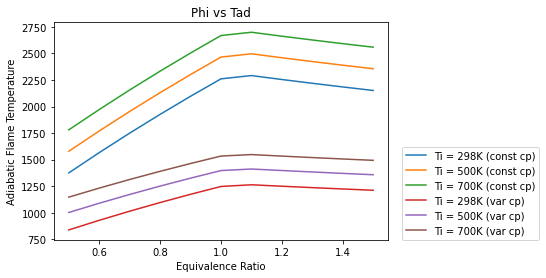

In [7]:
Tad0,phi = part1(Ti[0])
Tad1,phi = part1(Ti[1])
Tad2,phi = part1(Ti[2])
Tad3,phi = part2(Ti[0])
Tad4,phi = part2(Ti[1])
Tad5,phi = part2(Ti[2])
plt.plot(phi, Tad0, label="Ti = %dK (const cp)"%(Ti[0]))
plt.plot(phi, Tad1, label="Ti = %dK (const cp)"%(Ti[1]))
plt.plot(phi, Tad2, label="Ti = %dK (const cp)"%(Ti[2]))
plt.plot(phi, Tad3, label="Ti = %dK (var cp)"%(Ti[0]))
plt.plot(phi, Tad4, label="Ti = %dK (var cp)"%(Ti[1]))
plt.plot(phi, Tad5, label="Ti = %dK (var cp)"%(Ti[2]))
plt.xlabel('Equivalence Ratio')
plt.ylabel('Adiabatic Flame Temperature')
plt.title('Phi vs Tad')
plt.legend(loc=(1.04,0))

In [ ]:
print("Error at T=298K is ",Tadmax[0]-Tadmax[3],"K")
print("Error at T=500K is ",Tadmax[1]-Tadmax[4],"K")
print("Error at T=700K is ",Tadmax[2]-Tadmax[5],"K")